# Задание 5. Регрессионный анализ 

In [1]:
#1.
data("trees")
attach(trees)

In [2]:
#2.
names(trees)

[1] "Girth"  "Height" "Volume"

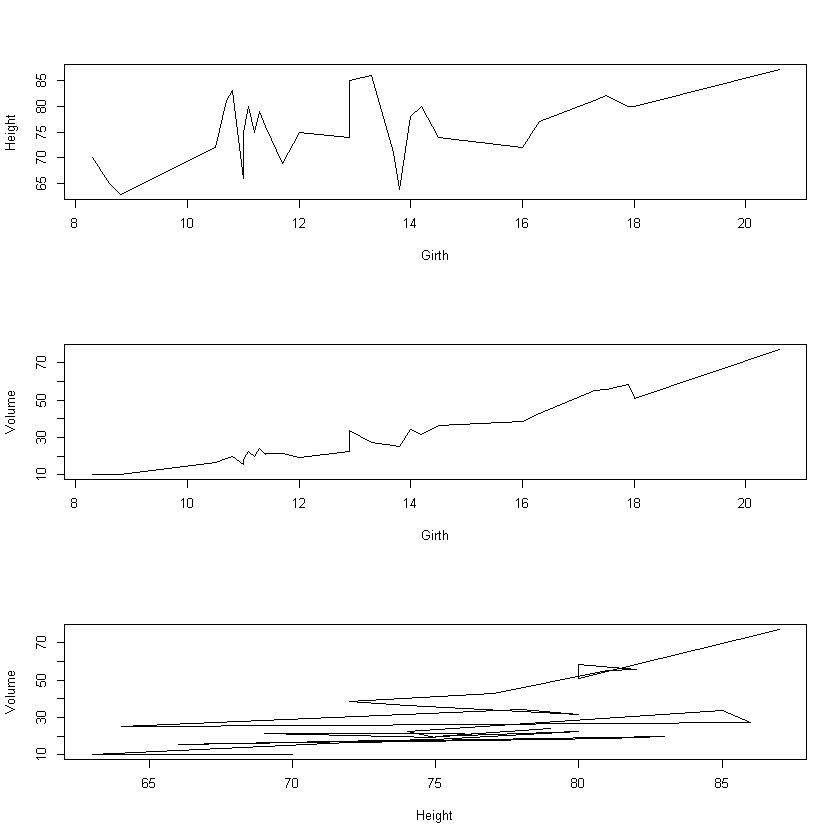

In [3]:
#3.
par(mfrow=c(3,1))
plot(Girth, Height, type="l")
plot(Girth, Volume, type="l")
plot(Height, Volume, type="l")

In [4]:
#4.

cor(trees)

regg = lm(formula(Volume ~ Girth + Height))
summary(regg)

,Girth,Height,Volume
Girth,1.0000000,0.5192801,0.9671194
Height,0.5192801,1.0000000,0.5982497
Volume,0.9671194,0.5982497,1.0000000



Call:
lm(formula = formula(Volume ~ Girth + Height))

Residuals:
    Min      1Q  Median      3Q     Max 
-6.4065 -2.6493 -0.2876  2.2003  8.4847 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -57.9877     8.6382  -6.713 2.75e-07 ***
Girth         4.7082     0.2643  17.816  < 2e-16 ***
Height        0.3393     0.1302   2.607   0.0145 *  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 3.882 on 28 degrees of freedom
Multiple R-squared:  0.948,	Adjusted R-squared:  0.9442 
F-statistic:   255 on 2 and 28 DF,  p-value: < 2.2e-16


In [ ]:
#5
#Фишер. Получили  p-value: < 2.2e-16 такую значимость тк меньше 0.05 нклевую гипотезу отвергаем
#следовательно существует линейная зависимость 

In [ ]:
#6
#Коэфф. R^2 => 0.948 т.е 94% отклонения от середины. высокий % означает о качественной модели.

In [ ]:
#7 
#уравнение зависимости => Volume = 4.7082*Girth + 0.3393*Height - 57.9877
# все переменне значимы тк Pr < 0.05 

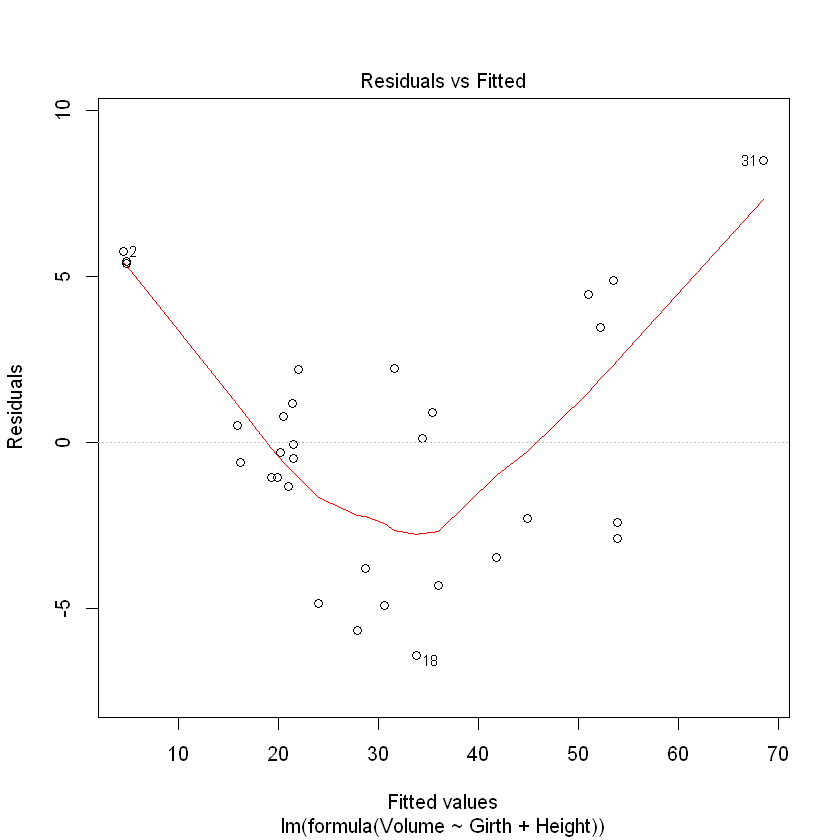

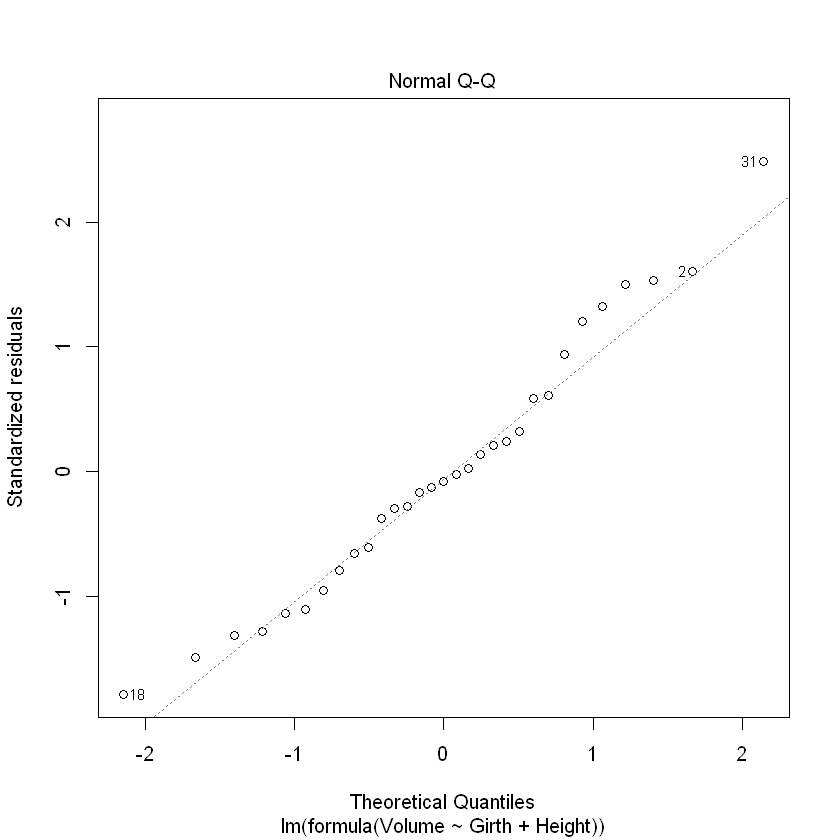

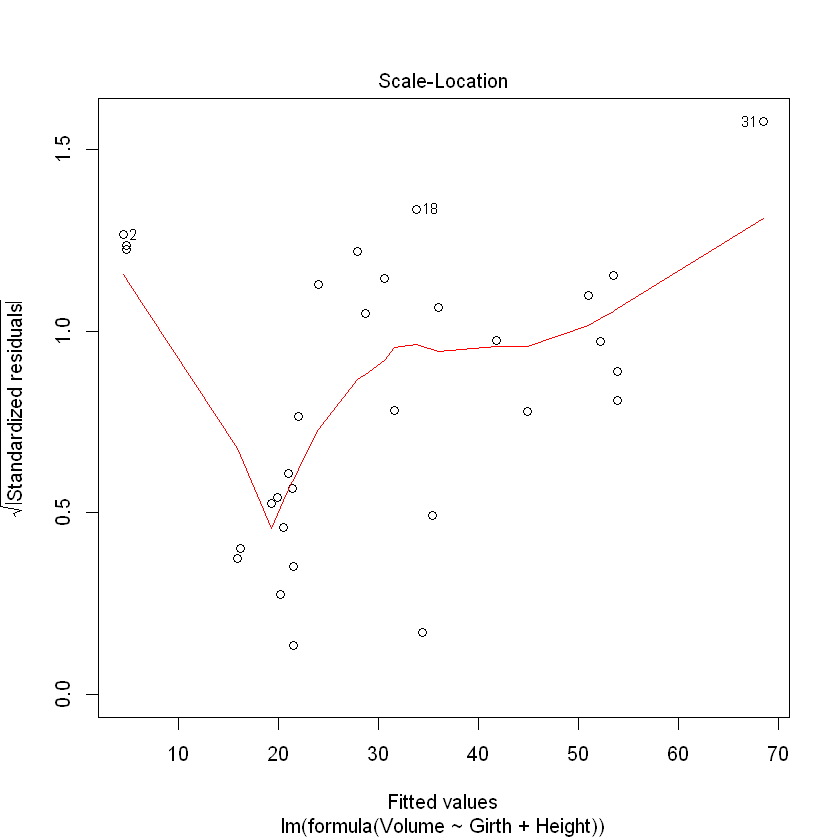

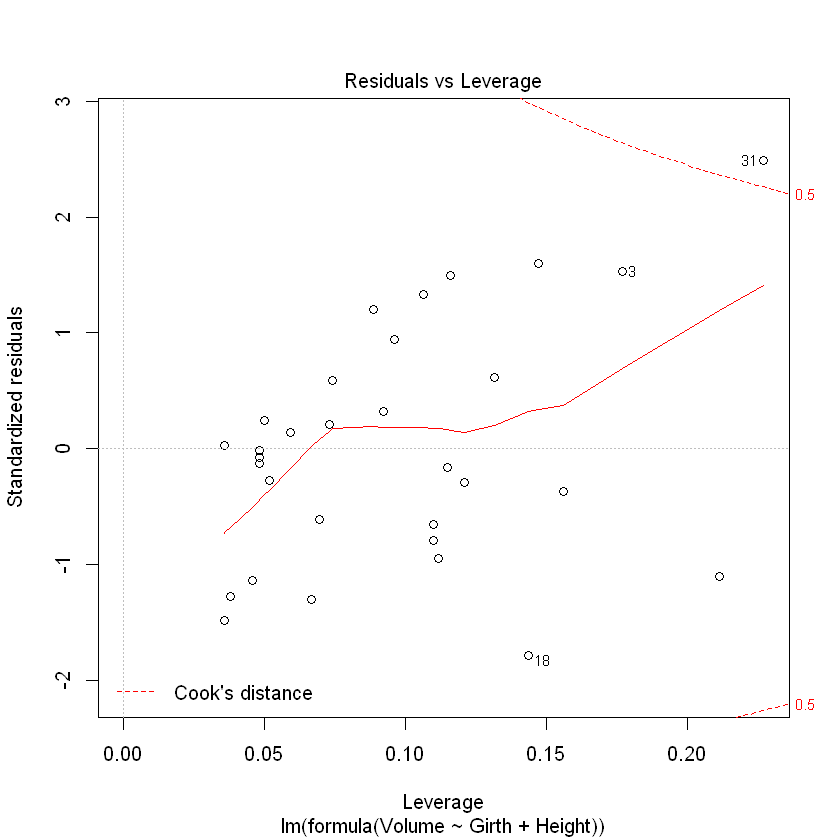

In [8]:
#8 
plot(regg)

In [ ]:
#9
# график "Normal Q-Q" показывает не хаотичное распределение т.е остатки при соединении образую одну 
#возрастающию диогональ значит остатки зависимы.

#график 'Residuals vs Fitted' выглядит как депрессия в экон. цикле

In [9]:
shapiro.test(residuals(regg))
# по тесту Шапиро-Уилка проверки на нармольность  p-value = 0.644 => гипотеза принемается
# значит график остатков имеет нормальный вид распределения


	Shapiro-Wilk normality test

data:  residuals(regg)
W = 0.97431, p-value = 0.644


In [10]:
r1 = residuals(regg)
d1 = data.frame(Volume, predict.lm(regg),r1)
d1

#Не все требовая к остаткам выполняются => построенная модель не подходит для описания исходных данных, его нельзя использовать для прогнозирование.

Volume,predict.lm.regg.,r1
10.3,4.837660,5.46234035
10.3,4.553852,5.74614837
10.2,4.816981,5.38301873
16.4,15.874115,0.52588477
18.8,19.869008,-1.06900844
19.7,21.018327,-1.31832696
15.6,16.192688,-0.59268807
18.2,19.245949,-1.04594918
22.6,21.413021,1.18697860
19.9,20.187581,-0.28758128


In [11]:
#10.
mse = mean(residuals(regg)^2)
mse

[1] 13.61037

In [ ]:
#Ввывод. Регрессионый анализ определил что между переммеными 
#1. есть зависимость 
#2. построенное уравнение плохо описывает зависимость между переменными
#3. расчитали среднеквадратичную ошибку она = 13.61037